In [1]:
library(ggplot2)
library(gridExtra)
library(rstan)
library(rstansensitivity)

rstan_options(auto_write=TRUE)
options(warn=1) # Display Stan warnings as they occur.

Loading required package: StanHeaders
rstan (Version 2.16.2, packaged: 2017-07-03 09:24:58 UTC, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
Loading required package: dplyr

Attaching package: ‘dplyr’

The following object is masked from ‘package:gridExtra’:

    combine

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: reshape2


In [2]:
git_repo_loc <- system("git rev-parse --show-toplevel", intern=TRUE)
example_path <- file.path(git_repo_loc, "examples/earnings_vary_si")
python_script <- file.path(git_repo_loc, "../StanSensitivity/python/generate_models.py")

base_model_name <- file.path(example_path, "models/earnings_vary_si.stan")
data_path <- file.path(example_path, "earnings_vary_si.data.R")


# Load the data into a list and set sampling parameters.
stan_data <- new.env()
source(data_path, local=stan_data)
stan_data <- as.list(stan_data)

iters <- 10000
adapt_delta <- 0.99

In [3]:
# Compile the models.
model_name <- GenerateSensitivityFromModel(base_model_name, python_script=python_script)
model <- stan_model(paste(model_name, "_generated.stan", sep=""))
stan_sensitivity_list <- GetStanSensitivityModel(model_name, stan_data)

recompiling to avoid crashing R session


In file included from /usr/local/lib/R/site-library/BH/include/boost/config.hpp:39:0,
                 from /usr/local/lib/R/site-library/BH/include/boost/math/tools/config.hpp:13,
                 from /usr/local/lib/R/site-library/StanHeaders/include/stan/math/rev/core/var.hpp:7,
                 from /usr/local/lib/R/site-library/StanHeaders/include/stan/math/rev/core/gevv_vvv_vari.hpp:5,
                 from /usr/local/lib/R/site-library/StanHeaders/include/stan/math/rev/core.hpp:12,
                 from /usr/local/lib/R/site-library/StanHeaders/include/stan/math/rev/mat.hpp:4,
                 from /usr/local/lib/R/site-library/StanHeaders/include/stan/math.hpp:4,
                 from /usr/local/lib/R/site-library/StanHeaders/include/src/stan/model/model_header.hpp:4,
                 from file3ea5650c3676.cpp:8:
/usr/local/lib/R/site-library/BH/include/boost/config/compiler/gcc.hpp:186:0: warning: "BOOST_NO_CXX11_RVALUE_REFERENCES" redefined
 #  define BOOST_NO_CXX11_RVALUE_RE

recompiling to avoid crashing R session


In file included from /usr/local/lib/R/site-library/BH/include/boost/config.hpp:39:0,
                 from /usr/local/lib/R/site-library/BH/include/boost/math/tools/config.hpp:13,
                 from /usr/local/lib/R/site-library/StanHeaders/include/stan/math/rev/core/var.hpp:7,
                 from /usr/local/lib/R/site-library/StanHeaders/include/stan/math/rev/core/gevv_vvv_vari.hpp:5,
                 from /usr/local/lib/R/site-library/StanHeaders/include/stan/math/rev/core.hpp:12,
                 from /usr/local/lib/R/site-library/StanHeaders/include/stan/math/rev/mat.hpp:4,
                 from /usr/local/lib/R/site-library/StanHeaders/include/stan/math.hpp:4,
                 from /usr/local/lib/R/site-library/StanHeaders/include/src/stan/model/model_header.hpp:4,
                 from file3ea55c292458.cpp:8:
/usr/local/lib/R/site-library/BH/include/boost/config/compiler/gcc.hpp:186:0: warning: "BOOST_NO_CXX11_RVALUE_REFERENCES" redefined
 #  define BOOST_NO_CXX11_RVALUE_RE

recompiling to avoid crashing R session


In file included from /usr/local/lib/R/site-library/BH/include/boost/config.hpp:39:0,
                 from /usr/local/lib/R/site-library/BH/include/boost/math/tools/config.hpp:13,
                 from /usr/local/lib/R/site-library/StanHeaders/include/stan/math/rev/core/var.hpp:7,
                 from /usr/local/lib/R/site-library/StanHeaders/include/stan/math/rev/core/gevv_vvv_vari.hpp:5,
                 from /usr/local/lib/R/site-library/StanHeaders/include/stan/math/rev/core.hpp:12,
                 from /usr/local/lib/R/site-library/StanHeaders/include/stan/math/rev/mat.hpp:4,
                 from /usr/local/lib/R/site-library/StanHeaders/include/stan/math.hpp:4,
                 from /usr/local/lib/R/site-library/StanHeaders/include/src/stan/model/model_header.hpp:4,
                 from file3ea51119ad89.cpp:8:
/usr/local/lib/R/site-library/BH/include/boost/config/compiler/gcc.hpp:186:0: warning: "BOOST_NO_CXX11_RVALUE_REFERENCES" redefined
 #  define BOOST_NO_CXX11_RVALUE_RE

In [4]:
# Run the sampler.
sampling_time <- Sys.time()
sampling_result <- sampling(
  model, data=stan_data, iter=iters, chains=1, control=list(adapt_delta=adapt_delta))
sampling_time <- Sys.time() - sampling_time
print(sampling_time)


SAMPLING FOR MODEL 'earnings_vary_si_generated' NOW (CHAIN 1).

Gradient evaluation took 6.4e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.64 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 10000 [  0%]  (Warmup)
Iteration: 1000 / 10000 [ 10%]  (Warmup)
Iteration: 2000 / 10000 [ 20%]  (Warmup)
Iteration: 3000 / 10000 [ 30%]  (Warmup)
Iteration: 4000 / 10000 [ 40%]  (Warmup)
Iteration: 5000 / 10000 [ 50%]  (Warmup)
Iteration: 5001 / 10000 [ 50%]  (Sampling)
Iteration: 6000 / 10000 [ 60%]  (Sampling)
Iteration: 7000 / 10000 [ 70%]  (Sampling)
Iteration: 8000 / 10000 [ 80%]  (Sampling)
Iteration: 9000 / 10000 [ 90%]  (Sampling)
Iteration: 10000 / 10000 [100%]  (Sampling)

 Elapsed Time: 66.6453 seconds (Warm-up)
               72.4481 seconds (Sampling)
               139.093 seconds (Total)



Warning message:
“There were 2 divergent transitions after warmup. Increasing adapt_delta above 0.99 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”

Time difference of 2.318783 mins


In [5]:
# Calculate the sensitivity.
sens_time <- Sys.time()
sens_result <- GetStanSensitivityFromModelFit(sampling_result, stan_sensitivity_list)
tidy_results <- GetTidyResult(sens_result)
sens_time <- Sys.time() - sens_time
print(sens_time)

Evaluating sensitivity model at the MCMC draws.
  |======================================================================| 100%


Warning message in mcmcse::mcse.multi(arg_draws):
“You either need more samples or x is not full column rank”Warning message in mcmcse::mcse.multi(par_draws):
“You either need more samples or x is not full column rank”Warning message in mcmcse::mcse.multi(par_draws):
“You either need more samples or x is not full column rank”Warning message in log(sig.eigen):
“NaNs produced”Warning message in mcmcse::mcse.multi(par_draws):
“You either need more samples or x is not full column rank”Warning message in log(sig.eigen):
“NaNs produced”

Time difference of 7.124251 secs


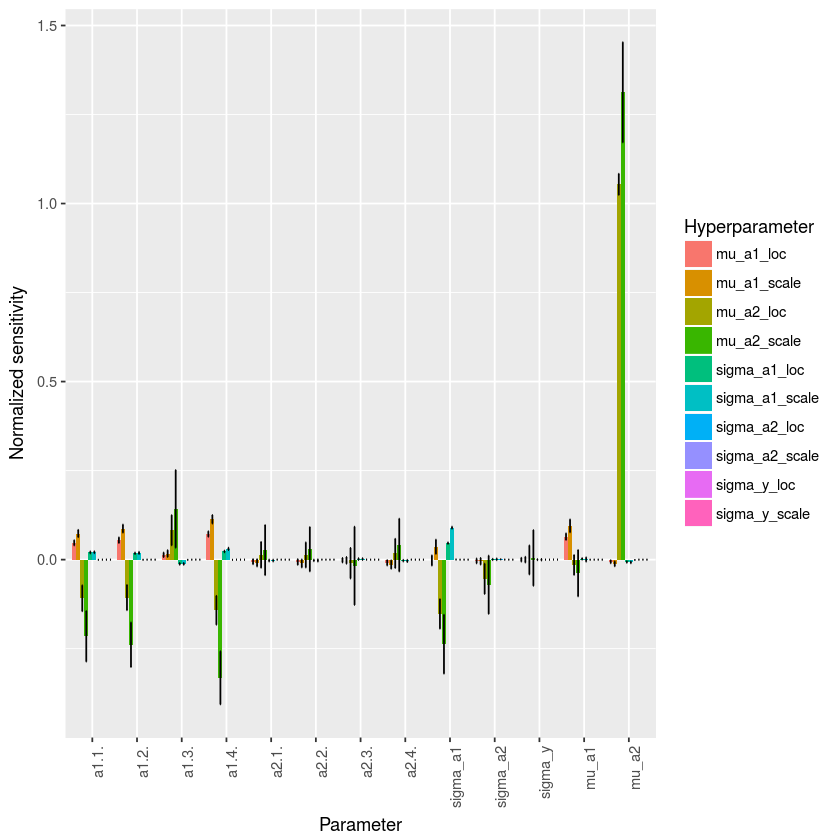

In [6]:
PlotSensitivities(tidy_results)

In [7]:
# Refit with a range of values for the hyperparameter.
StanResultToDataframe <- function(sampling_result) {
  sampling_df <- data.frame(summary(sampling_result)$summary)
  sampling_df$parameter <- make.names(rownames(sampling_df))
  return(sampling_df)
}

hyperparam_name <- "mu_a2_scale"
num_refits <- 10
hyperparam_min_offset <- -0.8
hyperparam_max_offset <- 1.0

hyperparam_vals <- seq(stan_data[[hyperparam_name]] + hyperparam_min_offset,
                     stan_data[[hyperparam_name]] + hyperparam_max_offset,
                     length.out=num_refits)

In [8]:
summary_list <- list()
sampling_result_list <- list()
refit_time <- Sys.time()
for (val in hyperparam_vals) {
    cat(sprintf("Value: %f", val))
    stan_data_perturbed <- stan_data
    stan_data_perturbed[[hyperparam_name]] <- val
    sampling_result_perturbed <-
      sampling(model, data=stan_data_perturbed, iter=iters, chains=1,
               control=list(adapt_delta=adapt_delta))
    sampling_result_list[[length(sampling_result_list) + 1]] <- sampling_result_perturbed
    sens_summary_peturbed <-
      StanResultToDataframe(sampling_result_perturbed) %>%
      mutate(hyperparameter=hyperparam_name, hyperparameter_val=val)
    summary_list[[length(summary_list) + 1]] <- sens_summary_peturbed
}
refit_time <- Sys.time() - refit_time



Value: 0.200000
SAMPLING FOR MODEL 'earnings_vary_si_generated' NOW (CHAIN 1).

Gradient evaluation took 8.7e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.87 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 10000 [  0%]  (Warmup)
Iteration: 1000 / 10000 [ 10%]  (Warmup)
Iteration: 2000 / 10000 [ 20%]  (Warmup)
Iteration: 3000 / 10000 [ 30%]  (Warmup)
Iteration: 4000 / 10000 [ 40%]  (Warmup)
Iteration: 5000 / 10000 [ 50%]  (Warmup)
Iteration: 5001 / 10000 [ 50%]  (Sampling)
Iteration: 6000 / 10000 [ 60%]  (Sampling)
Iteration: 7000 / 10000 [ 70%]  (Sampling)
Iteration: 8000 / 10000 [ 80%]  (Sampling)
Iteration: 9000 / 10000 [ 90%]  (Sampling)
Iteration: 10000 / 10000 [100%]  (Sampling)

 Elapsed Time: 72.1621 seconds (Warm-up)
               56.0836 seconds (Sampling)
               128.246 seconds (Total)



Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.99 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”

Value: 0.400000
SAMPLING FOR MODEL 'earnings_vary_si_generated' NOW (CHAIN 1).

Gradient evaluation took 5.8e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 10000 [  0%]  (Warmup)
Iteration: 1000 / 10000 [ 10%]  (Warmup)
Iteration: 2000 / 10000 [ 20%]  (Warmup)
Iteration: 3000 / 10000 [ 30%]  (Warmup)
Iteration: 4000 / 10000 [ 40%]  (Warmup)
Iteration: 5000 / 10000 [ 50%]  (Warmup)
Iteration: 5001 / 10000 [ 50%]  (Sampling)
Iteration: 6000 / 10000 [ 60%]  (Sampling)
Iteration: 7000 / 10000 [ 70%]  (Sampling)
Iteration: 8000 / 10000 [ 80%]  (Sampling)
Iteration: 9000 / 10000 [ 90%]  (Sampling)
Iteration: 10000 / 10000 [100%]  (Sampling)

 Elapsed Time: 68.4278 seconds (Warm-up)
               56.0286 seconds (Sampling)
               124.456 seconds (Total)

Value: 0.600000
SAMPLING FOR MODEL 'earnings_vary_si_generated' NOW (CHAIN 1).

Gradient evaluation took 5e-05 seconds
1000 trans

Warning message:
“There were 2 divergent transitions after warmup. Increasing adapt_delta above 0.99 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”

Value: 0.800000
SAMPLING FOR MODEL 'earnings_vary_si_generated' NOW (CHAIN 1).

Gradient evaluation took 4.8e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.48 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 10000 [  0%]  (Warmup)
Iteration: 1000 / 10000 [ 10%]  (Warmup)
Iteration: 2000 / 10000 [ 20%]  (Warmup)
Iteration: 3000 / 10000 [ 30%]  (Warmup)
Iteration: 4000 / 10000 [ 40%]  (Warmup)
Iteration: 5000 / 10000 [ 50%]  (Warmup)
Iteration: 5001 / 10000 [ 50%]  (Sampling)
Iteration: 6000 / 10000 [ 60%]  (Sampling)
Iteration: 7000 / 10000 [ 70%]  (Sampling)
Iteration: 8000 / 10000 [ 80%]  (Sampling)
Iteration: 9000 / 10000 [ 90%]  (Sampling)
Iteration: 10000 / 10000 [100%]  (Sampling)

 Elapsed Time: 65.8847 seconds (Warm-up)
               56.7012 seconds (Sampling)
               122.586 seconds (Total)



Warning message:
“There were 2 divergent transitions after warmup. Increasing adapt_delta above 0.99 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”

Value: 1.000000
SAMPLING FOR MODEL 'earnings_vary_si_generated' NOW (CHAIN 1).

Gradient evaluation took 7.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.71 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 10000 [  0%]  (Warmup)
Iteration: 1000 / 10000 [ 10%]  (Warmup)
Iteration: 2000 / 10000 [ 20%]  (Warmup)
Iteration: 3000 / 10000 [ 30%]  (Warmup)
Iteration: 4000 / 10000 [ 40%]  (Warmup)
Iteration: 5000 / 10000 [ 50%]  (Warmup)
Iteration: 5001 / 10000 [ 50%]  (Sampling)
Iteration: 6000 / 10000 [ 60%]  (Sampling)
Iteration: 7000 / 10000 [ 70%]  (Sampling)
Iteration: 8000 / 10000 [ 80%]  (Sampling)
Iteration: 9000 / 10000 [ 90%]  (Sampling)
Iteration: 10000 / 10000 [100%]  (Sampling)

 Elapsed Time: 72.3364 seconds (Warm-up)
               65.2581 seconds (Sampling)
               137.594 seconds (Total)



Warning message:
“There were 5 divergent transitions after warmup. Increasing adapt_delta above 0.99 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”

Value: 1.200000
SAMPLING FOR MODEL 'earnings_vary_si_generated' NOW (CHAIN 1).

Gradient evaluation took 5.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.51 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 10000 [  0%]  (Warmup)
Iteration: 1000 / 10000 [ 10%]  (Warmup)
Iteration: 2000 / 10000 [ 20%]  (Warmup)
Iteration: 3000 / 10000 [ 30%]  (Warmup)
Iteration: 4000 / 10000 [ 40%]  (Warmup)
Iteration: 5000 / 10000 [ 50%]  (Warmup)
Iteration: 5001 / 10000 [ 50%]  (Sampling)
Iteration: 6000 / 10000 [ 60%]  (Sampling)
Iteration: 7000 / 10000 [ 70%]  (Sampling)
Iteration: 8000 / 10000 [ 80%]  (Sampling)
Iteration: 9000 / 10000 [ 90%]  (Sampling)
Iteration: 10000 / 10000 [100%]  (Sampling)

 Elapsed Time: 66.2975 seconds (Warm-up)
               85.4392 seconds (Sampling)
               151.737 seconds (Total)



Warning message:
“There were 3 divergent transitions after warmup. Increasing adapt_delta above 0.99 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“There were 2 transitions after warmup that exceeded the maximum treedepth. Increase max_treedepth above 10. See
http://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”

Value: 1.400000
SAMPLING FOR MODEL 'earnings_vary_si_generated' NOW (CHAIN 1).

Gradient evaluation took 5.2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.52 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 10000 [  0%]  (Warmup)
Iteration: 1000 / 10000 [ 10%]  (Warmup)
Iteration: 2000 / 10000 [ 20%]  (Warmup)
Iteration: 3000 / 10000 [ 30%]  (Warmup)
Iteration: 4000 / 10000 [ 40%]  (Warmup)
Iteration: 5000 / 10000 [ 50%]  (Warmup)
Iteration: 5001 / 10000 [ 50%]  (Sampling)
Iteration: 6000 / 10000 [ 60%]  (Sampling)
Iteration: 7000 / 10000 [ 70%]  (Sampling)
Iteration: 8000 / 10000 [ 80%]  (Sampling)
Iteration: 9000 / 10000 [ 90%]  (Sampling)
Iteration: 10000 / 10000 [100%]  (Sampling)

 Elapsed Time: 72.2785 seconds (Warm-up)
               151.341 seconds (Sampling)
               223.619 seconds (Total)



Warning message:
“There were 7 divergent transitions after warmup. Increasing adapt_delta above 0.99 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“There were 897 transitions after warmup that exceeded the maximum treedepth. Increase max_treedepth above 10. See
http://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”

Value: 1.600000
SAMPLING FOR MODEL 'earnings_vary_si_generated' NOW (CHAIN 1).

Gradient evaluation took 7.3e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.73 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 10000 [  0%]  (Warmup)
Iteration: 1000 / 10000 [ 10%]  (Warmup)
Iteration: 2000 / 10000 [ 20%]  (Warmup)
Iteration: 3000 / 10000 [ 30%]  (Warmup)
Iteration: 4000 / 10000 [ 40%]  (Warmup)
Iteration: 5000 / 10000 [ 50%]  (Warmup)
Iteration: 5001 / 10000 [ 50%]  (Sampling)
Iteration: 6000 / 10000 [ 60%]  (Sampling)
Iteration: 7000 / 10000 [ 70%]  (Sampling)
Iteration: 8000 / 10000 [ 80%]  (Sampling)
Iteration: 9000 / 10000 [ 90%]  (Sampling)
Iteration: 10000 / 10000 [100%]  (Sampling)

 Elapsed Time: 78.9537 seconds (Warm-up)
               174.268 seconds (Sampling)
               253.222 seconds (Total)



Warning message:
“There were 16 divergent transitions after warmup. Increasing adapt_delta above 0.99 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“There were 1673 transitions after warmup that exceeded the maximum treedepth. Increase max_treedepth above 10. See
http://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”

Value: 1.800000
SAMPLING FOR MODEL 'earnings_vary_si_generated' NOW (CHAIN 1).

Gradient evaluation took 6.9e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.69 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 10000 [  0%]  (Warmup)
Iteration: 1000 / 10000 [ 10%]  (Warmup)
Iteration: 2000 / 10000 [ 20%]  (Warmup)
Iteration: 3000 / 10000 [ 30%]  (Warmup)
Iteration: 4000 / 10000 [ 40%]  (Warmup)
Iteration: 5000 / 10000 [ 50%]  (Warmup)
Iteration: 5001 / 10000 [ 50%]  (Sampling)
Iteration: 6000 / 10000 [ 60%]  (Sampling)
Iteration: 7000 / 10000 [ 70%]  (Sampling)
Iteration: 8000 / 10000 [ 80%]  (Sampling)
Iteration: 9000 / 10000 [ 90%]  (Sampling)
Iteration: 10000 / 10000 [100%]  (Sampling)

 Elapsed Time: 98.3624 seconds (Warm-up)
               58.5343 seconds (Sampling)
               156.897 seconds (Total)



Warning message:
“There were 59 divergent transitions after warmup. Increasing adapt_delta above 0.99 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”

Value: 2.000000
SAMPLING FOR MODEL 'earnings_vary_si_generated' NOW (CHAIN 1).

Gradient evaluation took 5.4e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.54 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 10000 [  0%]  (Warmup)
Iteration: 1000 / 10000 [ 10%]  (Warmup)
Iteration: 2000 / 10000 [ 20%]  (Warmup)
Iteration: 3000 / 10000 [ 30%]  (Warmup)
Iteration: 4000 / 10000 [ 40%]  (Warmup)
Iteration: 5000 / 10000 [ 50%]  (Warmup)
Iteration: 5001 / 10000 [ 50%]  (Sampling)
Iteration: 6000 / 10000 [ 60%]  (Sampling)
Iteration: 7000 / 10000 [ 70%]  (Sampling)
Iteration: 8000 / 10000 [ 80%]  (Sampling)
Iteration: 9000 / 10000 [ 90%]  (Sampling)
Iteration: 10000 / 10000 [100%]  (Sampling)

 Elapsed Time: 95.4756 seconds (Warm-up)
               57.723 seconds (Sampling)
               153.199 seconds (Total)



Warning message:
“There were 67 divergent transitions after warmup. Increasing adapt_delta above 0.99 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“There were 1 transitions after warmup that exceeded the maximum treedepth. Increase max_treedepth above 10. See
http://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded”Warning message:
“There were 1 chains where the estimated Bayesian Fraction of Missing Information was low. See
http://mc-stan.org/misc/warnings.html#bfmi-low”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”

In [17]:
print("Refit time: ")
print(refit_time)

[1] "Refit time: "
Time difference of 26.74969 mins


In [9]:
perturbed_df <-
    do.call(rbind, summary_list) %>%
    inner_join(tidy_results, by=c("parameter", "hyperparameter")) %>%
    inner_join(StanResultToDataframe(sampling_result),
               by="parameter", suffix=c("", ".orig"))

Warning message:
“Column `parameter` joining character vector and factor, coercing into character vector”

In [13]:
refit_filename <- file.path(example_path, "earnings_vary_si_refit_results.Rdata")
cat("Saving to\n", refit_filename, "\n")
save(model_name, tidy_results, stan_data,
     perturbed_df, summary_list, sampling_result, sampling_result_list,
     sampling_time, sens_time, refit_time,
     hyperparam_name, hyperparam_vals,
     file=refit_filename)

Saving to
 /home/rgiordan/Documents/git_repos/StanSensitivitySandbox/examples/earnings_vary_si/earnings_vary_si_refit_results.Rdata 
